In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris/Iris.csv
/kaggle/input/iris/database.sqlite


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from sklearn import tree
import graphviz 
import os
import preprocessing 

from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.decomposition import PCA


from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import classification_report


# Import Data

In [3]:
data = pd.read_csv('../input/iris/Iris.csv')


In [4]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
data.isnull().sum().sum()

0

In [6]:
setosa = data[data['Species'] == 'Iris-setosa']
versicolor = data[data['Species'] == 'Iris-versicolor']
virginica = data[data['Species'] == 'Iris-virginica']

# Box Plot

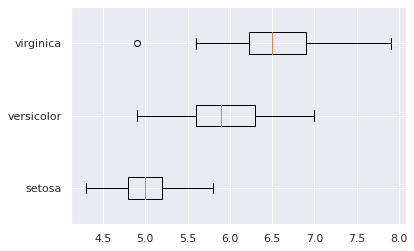

In [7]:
feature = 'SepalLengthCm'

bp_data = [setosa[feature], versicolor[feature], virginica[feature]]
plt.boxplot(bp_data, vert=False, labels=['setosa', 'versicolor', 'virginica'])
plt.show()

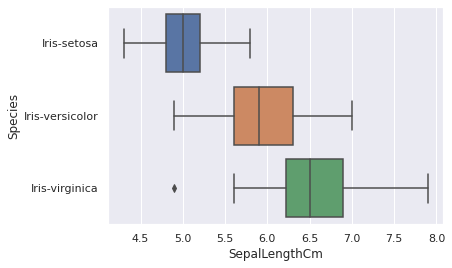

In [8]:
sns.boxplot(x='SepalLengthCm', y='Species', data=data)
plt.show()

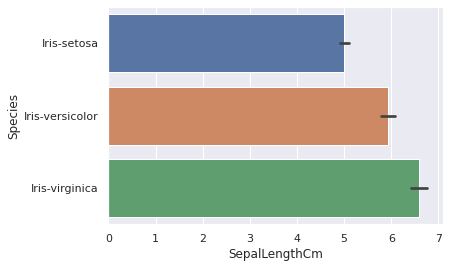

In [9]:
sns.barplot(x='SepalLengthCm', y='Species', data=data)
plt.show()

# Scatter Plot

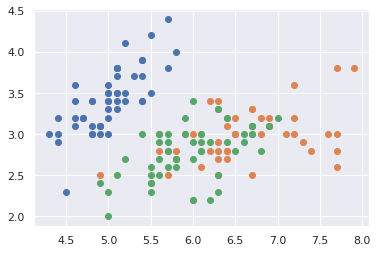

In [10]:
plt.scatter(setosa['SepalLengthCm'].values, setosa['SepalWidthCm'].values)
plt.scatter(virginica['SepalLengthCm'].values, virginica['SepalWidthCm'].values)
plt.scatter(versicolor['SepalLengthCm'].values, versicolor['SepalWidthCm'].values)
plt.show()

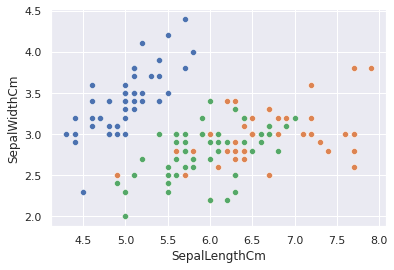

In [11]:
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', data=setosa)
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', data=virginica)
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', data=versicolor)
plt.show()

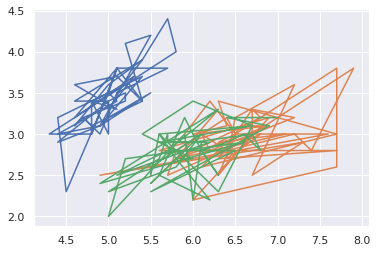

In [12]:
plt.plot(setosa['SepalLengthCm'].values, setosa['SepalWidthCm'].values)
plt.plot(virginica['SepalLengthCm'].values, virginica['SepalWidthCm'].values)
plt.plot(versicolor['SepalLengthCm'].values, versicolor['SepalWidthCm'].values)
plt.show()

# Violin Plot

<AxesSubplot:xlabel='Species', ylabel='SepalWidthCm'>

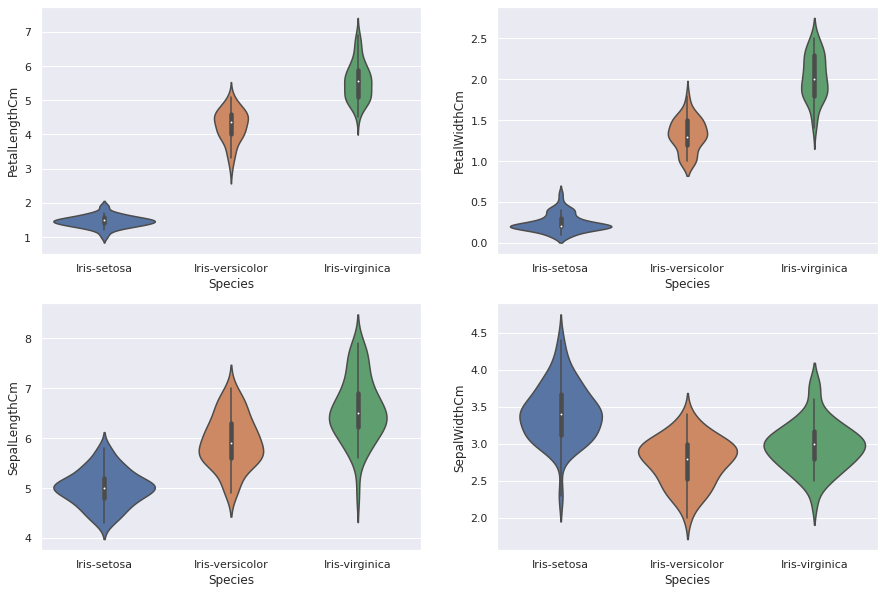

In [13]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='PetalLengthCm',data=data)
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='PetalWidthCm',data=data)
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='SepalLengthCm',data=data)
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='SepalWidthCm',data=data)

In [14]:
species_mapping = {'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2}

In [15]:
data['Species'] = data['Species'].map(species_mapping)


In [16]:
print(data['Species'])

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64


In [17]:
X=data.drop(['Id','Species'],axis=1)
y=data['Species']

In [18]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X = sc.fit_transform(X)


# Train-Test Split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101) 

print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 150
Total # of sample in train dataset: 100
Total # of sample in test dataset: 50


# Logistic Regression

In [20]:
LogReg = LogisticRegression()

In [21]:
LogReg.fit(X_train, y_train)

LogisticRegression()

In [22]:
y_pred = LogReg.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

0.98

# KNN Classifier

In [23]:
knn=KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)
pred=knn.predict(X_test)

In [24]:
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))
accuracy_score(pred, y_test)

[[15  0  0]
 [ 0 22  0]
 [ 0  1 12]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.96      1.00      0.98        22
           2       1.00      0.92      0.96        13

    accuracy                           0.98        50
   macro avg       0.99      0.97      0.98        50
weighted avg       0.98      0.98      0.98        50



0.98